In [1]:
import numpy as np
import pandas as pd

# Read the CSV file using ISO-8859-1 encoding
raw_dataset = pd.read_csv('Modified_SQL_Dataset.csv', encoding='ISO-8859-1')

# Display information about the dataset
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


In [2]:
raw_dataset.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [3]:
raw_dataset.tail()

,Query,Label
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0
30918,SELECT TOP 3 * FROM race,0


In [4]:
raw_dataset.isnull().sum()

Query    0
Label    0
dtype: int64

In [5]:
raw_dataset.isna().sum()

Query    0
Label    0
dtype: int64

<Axes: xlabel='Label'>

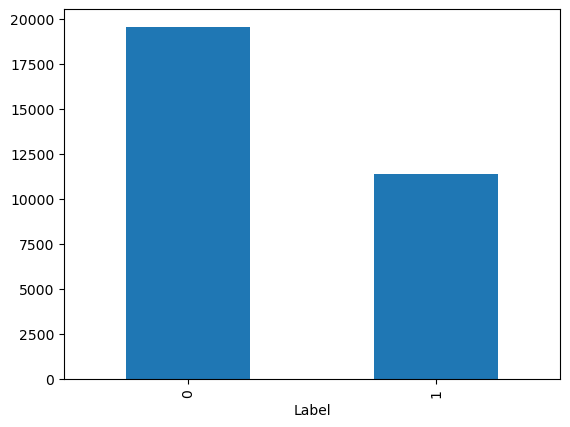

In [6]:
raw_dataset['Label'].value_counts().plot(kind='bar')

In [7]:
raw_dataset[raw_dataset.duplicated(keep=False)].sort_values(by=['Query'])

,Query,Label
656,#NAME?,1
866,#NAME?,1
15635,#NAME?,0
17913,#NAME?,0
13532,#NAME?,0
...,...,...
13214,9.55E+15,0
13355,9.77E+15,0
16946,9.77E+15,0
17760,9.83E+15,0


In [8]:
raw_dataset.drop_duplicates(keep=False, inplace=True)

In [9]:
raw_dataset.shape

(30632, 2)

In [10]:
import re

In [11]:
sample_query = raw_dataset['Query'][9780]
sample_query

"1'||  (  select 'rjis' from dual where 7696  =  7696 and 3754  =    (  select upper  (  xmltype  (  chr  (  60  )  ||chr  (  58  )  ||chr  (  113  )  ||chr  (  113  )  ||chr  (  112  )  ||chr  (  106  )  ||chr  (  113  )  ||  (  select   (  case when   (  3754  =  3754  )   then 1 else 0 end  )   from dual  )  ||chr  (  113  )  ||chr  (  122  )  ||chr  (  118  )  ||chr  (  122  )  ||chr  (  113  )  ||chr  (  62   )    )     )   from dual   )    )   ||'"

In [12]:
def remove_spaces(input_string):
    cleaned = re.sub('\s{2,}',' ',input_string)
    return cleaned.lower().strip()

print(remove_spaces(sample_query))

1'|| ( select 'rjis' from dual where 7696 = 7696 and 3754 = ( select upper ( xmltype ( chr ( 60 ) ||chr ( 58 ) ||chr ( 113 ) ||chr ( 113 ) ||chr ( 112 ) ||chr ( 106 ) ||chr ( 113 ) || ( select ( case when ( 3754 = 3754 ) then 1 else 0 end ) from dual ) ||chr ( 113 ) ||chr ( 122 ) ||chr ( 118 ) ||chr ( 122 ) ||chr ( 113 ) ||chr ( 62 ) ) ) from dual ) ) ||'


In [13]:
def clean_all(input_string):
    cleaned = re.sub('[^a-zA-Z0-9\s]',' ',input_string)
    cleaned = re.sub('\s{2,}',' ',cleaned)
    return cleaned.lower().strip()
print(clean_all(sample_query))

1 select rjis from dual where 7696 7696 and 3754 select upper xmltype chr 60 chr 58 chr 113 chr 113 chr 112 chr 106 chr 113 select case when 3754 3754 then 1 else 0 end from dual chr 113 chr 122 chr 118 chr 122 chr 113 chr 62 from dual


In [14]:
dataset_with_special_characters = raw_dataset.copy()
dataset_with_special_characters['Query'] = dataset_with_special_characters['Query'].apply(remove_spaces)
dataset_with_special_characters.head()

,Query,Label
0,""" or pg_sleep ( __time__ ) --",1
1,create user name identified by pass123 tempora...,1
2,and 1 = utl_inaddr.get_host_address ( ( select...,1
3,select * from users where id = '1' or @ @1 = 1...,1
4,"select * from users where id = 1 or 1#"" ( unio...",1


In [15]:
dataset_all_cleaned = raw_dataset.copy()
dataset_all_cleaned['Query'] = dataset_all_cleaned['Query'].apply(clean_all)
dataset_all_cleaned.head()

,Query,Label
0,or pg sleep time,1
1,create user name identified by pass123 tempora...,1
2,and 1 utl inaddr get host address select disti...,1
3,select from users where id 1 or 1 1 union sele...,1
4,select from users where id 1 or 1 union select...,1


In [16]:
dataset_all_cleaned[dataset_all_cleaned.duplicated(keep=False)].sort_values(by='Query')

,Query,Label
863,,1
535,,1
856,,1
282,,1
402,,1
...,...,...
756,x and members email is null,1
464,x and userid is null,1
362,x and userid is null,1
865,x or full name like bob,1


In [17]:
dataset_all_cleaned.drop_duplicates(keep='first', inplace=True)
dataset_all_cleaned.shape

(27873, 2)

In [18]:
no_of_special_chars = raw_dataset['Query'].map(lambda x:len(re.findall('[^a-zA-Z0-9\s]',x)))
no_of_special_chars.describe()

count    30632.000000
mean         8.027520
std         12.393144
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        601.000000
Name: Query, dtype: float64

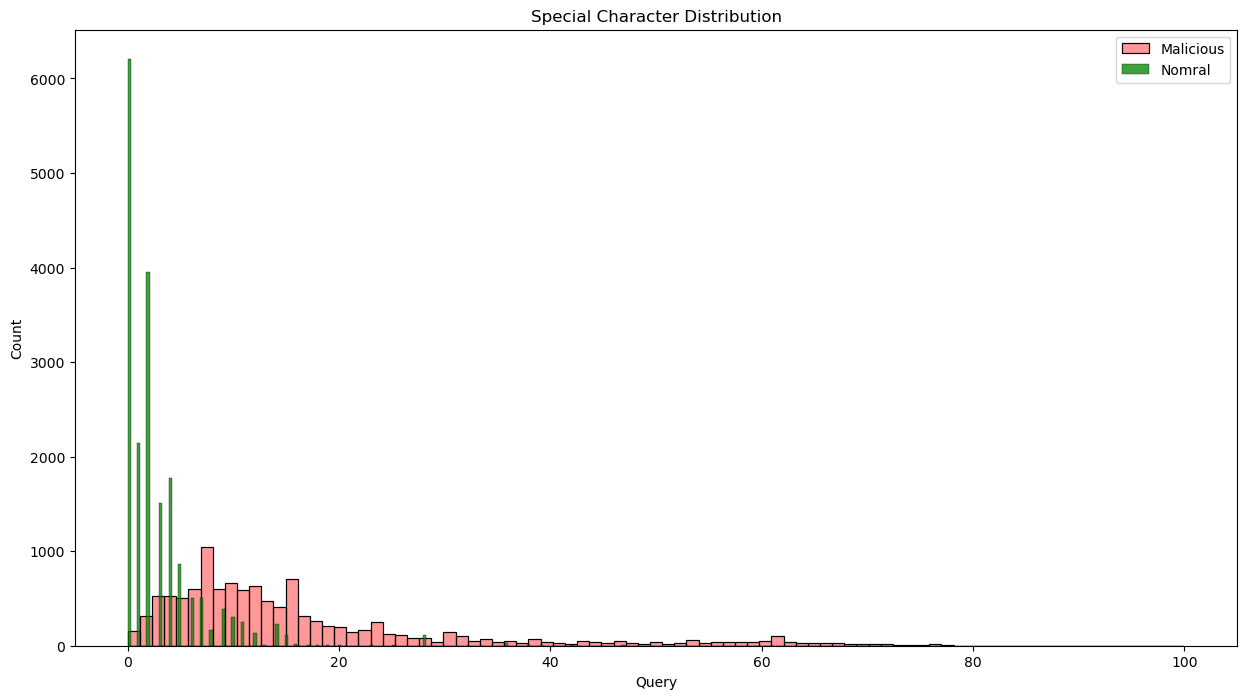

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
fig3, ax_sc = plt.subplots(1, 1, figsize=(15,8))
sns.histplot(no_of_special_chars[raw_dataset['Label']==1], ax=ax_sc, color='red', label='Malicious', binrange=(0,100) ,alpha=0.4)
sns.histplot(no_of_special_chars[raw_dataset['Label']==0], ax=ax_sc, color='green', label='Nomral', binrange=(0,100))
ax_sc.set_title("Special Character Distribution")
ax_sc.legend()

In [20]:
query_length = dataset_all_cleaned.Query.map(lambda x:len(x.split()))
query_length.describe()

count    27873.000000
mean         9.063969
std          9.272374
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max        542.000000
Name: Query, dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

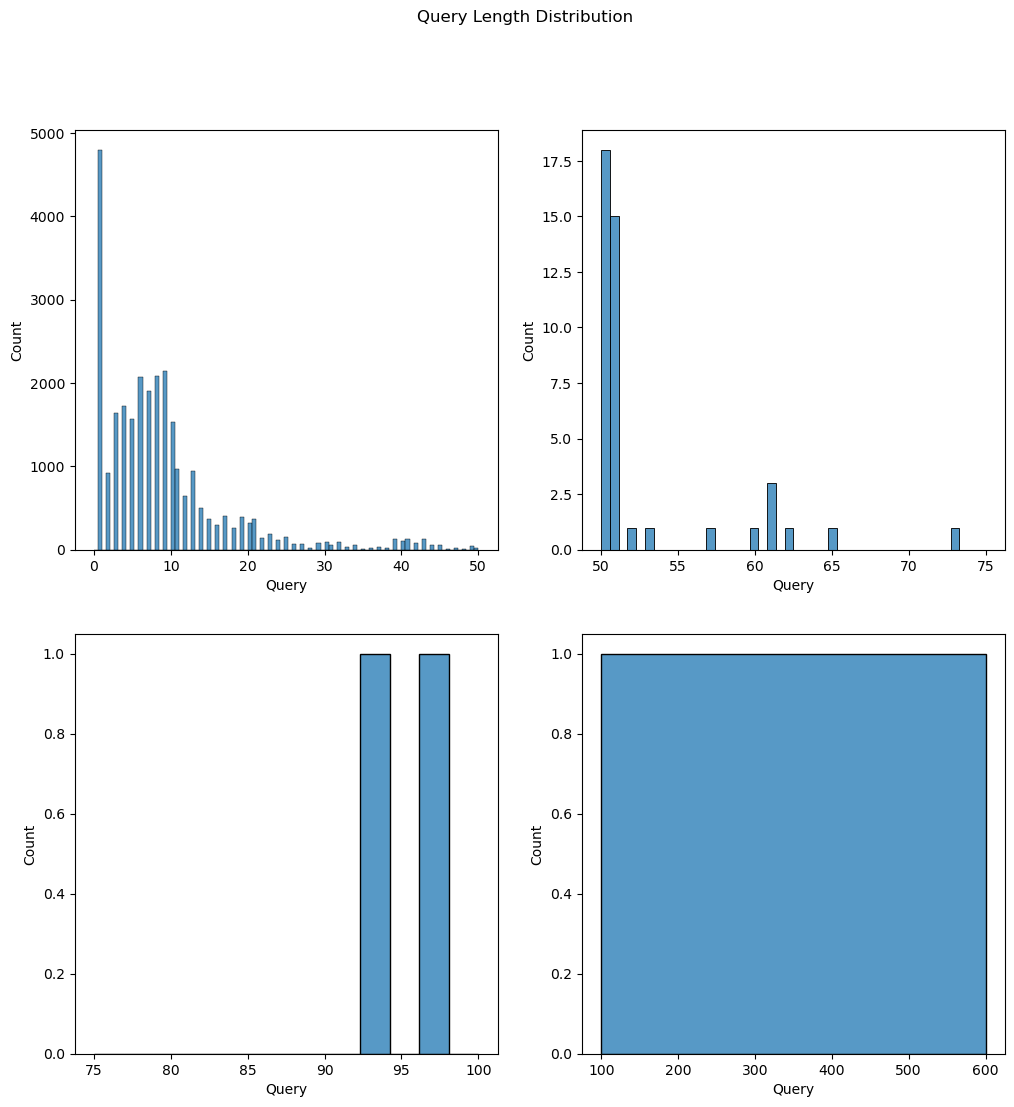

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
sns.histplot(query_length, binrange=(0,50), ax=ax1)
sns.histplot(query_length, binrange=(50,75), ax=ax2)
sns.histplot(query_length, binrange=(75,100), ax=ax3)
sns.histplot(query_length, binrange=(100,600), ax=ax4)
plt.suptitle("Query Length Distribution");

In [23]:
print("0 words   =", (query_length==0).value_counts()[True])
print("1 words   =", (query_length==1).value_counts()[True])
print("2 words   =", (query_length==2).value_counts()[True])
print("Less than 5 words   =", (query_length<5).value_counts()[True])
print("Less than 10 words  =", (query_length<10).value_counts()[True])
print("Less than 15 words  =", (query_length<15).value_counts()[True])
print("Less than 50 words  =", (query_length<50).value_counts()[True])
print("More than 90 words =", (query_length>90).value_counts()[True])
print("More than 500 words =", (query_length>500).value_counts()[True])

0 words   = 1
1 words   = 4797
2 words   = 918
Less than 5 words   = 9075
Less than 10 words  = 18843
Less than 15 words  = 23424
Less than 50 words  = 27827
More than 90 words = 3
More than 500 words = 1
